### Setup

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

from tensorflow.keras import layers

### Dataset download (flowers)

In [8]:
(train_ds, val_ds, test_ds), metadata = tfds.load(
    'tf_flowers',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    with_info=True,
    as_supervised=True
)

In [16]:
num_classes = metadata.features['label'].num_classes
num_classes

5

### Datasete image retrieving

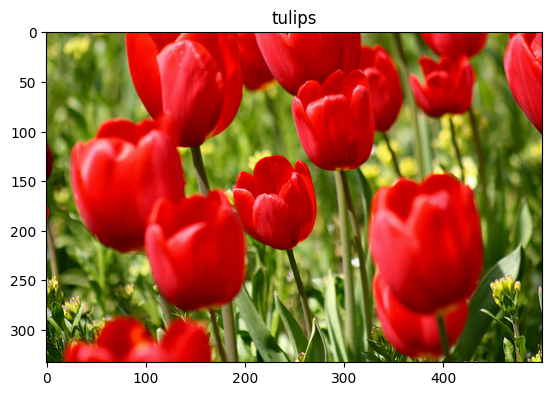

In [20]:
get_label_name = metadata.features['label'].int2str

image, label = next(iter(train_ds))
_ = plt.imshow(image)
_ = plt.title(get_label_name(label))

## Keras processing layers

### Resize and Rescale

In [23]:
IMG_SIZE = 180

resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMG_SIZE, IMG_SIZE), # resize to IMG_SIZE x IMG_SIZE
    layers.Rescaling(1./255) # rescale the pixel values from [0,255] to [0, 1]
])

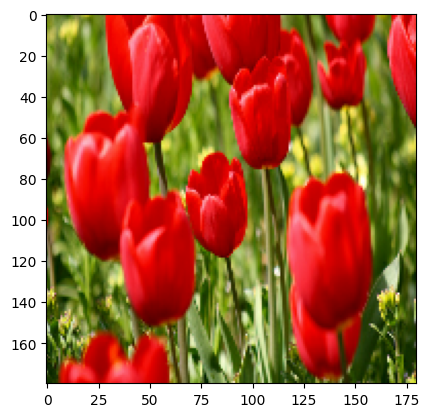

In [25]:
result = resize_and_rescale(image)
_ = plt.imshow(result)

In [28]:
print("Min and max pixel values:", result.numpy().min(), result.numpy().max())

Min and max pixel values: 0.0 1.0


### Data augmentation

In [112]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
])

In [114]:
# add the image to a batch (batch = set or group)
# image = tf.cast(tf.expand_dims(image, 0), tf.float32)
image = tf.expand_dims(image, 0)
plt.figure(figsize=(10, 10))

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

In [116]:
plt.figure(figsize=(10, 10))
for i in range(9):
    augmented_image = data_augmentation(image)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_image[0])
    plt.axis("off")

UnimplementedError: Exception encountered when calling RandomFlip.call().

[1m{{function_node __wrapped__ReverseV2_device_/job:localhost/replica:0/task:0/device:CPU:0}} reverse is not implemented for tensors of rank > 8. [Op:ReverseV2][0m

Arguments received by RandomFlip.call():
  • inputs=tf.Tensor(shape=(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 333, 500, 3), dtype=float32)
  • training=True

<Figure size 1000x1000 with 0 Axes>